<a href="https://colab.research.google.com/github/GabrielaSchubert/Python_no_Google_Colaboratory/blob/main/Aula_01_Padr%C3%B5es_de_Projeto_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Há a necessidade de criar um esquema que utilize quatro formas bastante conhecidas de ordenação:
bubble sort, insertion sort, merge sort e quick sort. Coloque-as no padrão Strategy e escreva um
cliente que alterna a estratégia de ordenação livremente. (Apenas desenhar o diagrama que
representa o padrão Strategy).

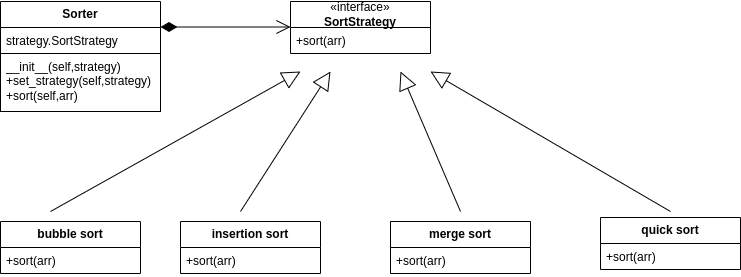

2) Considerando as classes abaixo, execute as seguintes atividades:
• Organize as hierarquias de classes adequadas
• Identifique uma classe abstrata, uma interface e oito classes
• Desenhe as setas dos relacionamentos entre as classes
• É_UM (IS-A)
• TEM_UM (HAS-A)
• IMPLEMENTA (Implements)
• Crie um método chamado atribuiArma() e coloque-o na classe certa
• O esquema de classes deve representar o padrão Strategy.

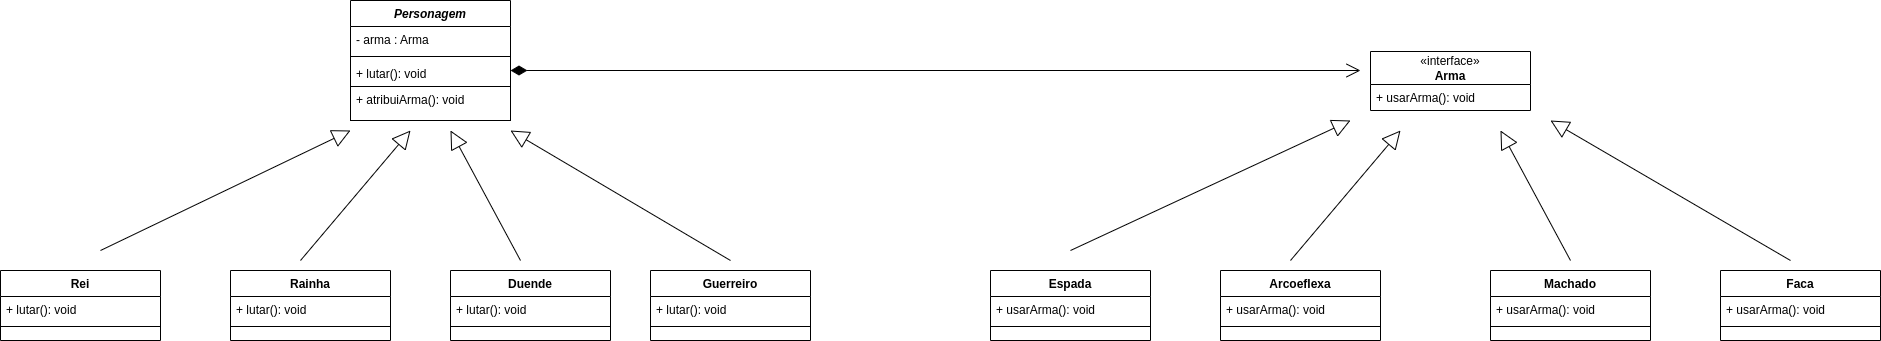

**3) Implementação do código da questão 1**

In [ ]:
from abc import ABC, abstractmethod

class SortStrategy(ABC):
    @abstractmethod
    def sort(self,arr):
      pass

class Sorter():

    def __init__(self, strategy: SortStrategy):
        self.strategy = strategy

    def set_strategy(self, strategy: SortStrategy):
        self.strategy = strategy

    def sort(self, arr):
        return self.strategy.sort(arr)

class BubbleSort(SortStrategy):
    def sort(self, arr):
        n = len(arr)
        for i in range(n):
            for j in range(0, n-i-1):
                if arr[j] > arr[j+1]:
                    arr[j], arr[j+1] = arr[j+1], arr[j]
        return arr

class InsertionSort(SortStrategy):
    def sort(self, arr):
        for i in range(1, len(arr)):
            key = arr[i]
            j = i-1
            while j >= 0 and key < arr[j]:
                arr[j+1] = arr[j]
                j -= 1
            arr[j+1] = key
        return arr

class MergeSort(SortStrategy):
    def sort(self, arr):
        if len(arr) <= 1:
          return arr
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        left = self.sort(left)
        right = self.sort(right)
        return self.merge(left, right)

    def merge(self, left, right):
        result = []
        i = j = 0

        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        result += left[i:]
        result += right[j:]
        return result

class QuickSort(SortStrategy):
    def sort(self, arr):
        if len(arr) <= 1:
            return arr
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return self.sort(left) + middle + self.sort(right)

if __name__ == "__main__":
    arr = [14,36,28,10,93,71]

    sorter = Sorter(BubbleSort())
    print("Bubble Sort:", sorter.sort(arr))

    sorter.set_strategy(InsertionSort())
    print("InsertionSort:", sorter.sort(arr))

    sorter.set_strategy(MergeSort())
    print("MergeSort:", sorter.sort(arr))

    sorter.set_strategy(QuickSort())
    print("QuickSort:", sorter.sort(arr))


Bubble Sort: [10, 14, 28, 36, 71, 93]
InsertionSort: [10, 14, 28, 36, 71, 93]
MergeSort: [10, 14, 28, 36, 71, 93]
QuickSort: [10, 14, 28, 36, 71, 93]


**Implementação do código da questão 2**

In [ ]:
from abc import ABC, abstractmethod

class ArmaStrategy(ABC):
    @abstractmethod
    def usarArma(self):
        pass

class Personagem():
    def __init__(self, arma: ArmaStrategy = None):
        self.__arma = arma

    def lutar(self):
        if self.__arma:
            return self.__arma.usarArma()
        else:
            return "Sem arma"

    def getArma(self):
        return self.__arma

    def setArma(self, arma: ArmaStrategy):
        self.__arma = arma

    def atribuiArma(self, arma: ArmaStrategy):
        self.__arma = arma

class Rei(Personagem):
    def lutar(self):
        print("Rei lutando")
        print(super().lutar())

class Rainha(Personagem):
    def lutar(self):
        print("Rainha lutando")
        print(super().lutar())

class Duende(Personagem):
    def lutar(self):
        print("Duende lutando")
        print(super().lutar())

class Guerreiro(Personagem):
    def lutar(self):
        print("Guerreiro lutando")
        print(super().lutar())

class Espada(ArmaStrategy):
    def usarArma(self):
        return "Usando espada"

class ArcoeFlecha(ArmaStrategy):
    def usarArma(self):
        return "Usando arco e flecha"

class Machado(ArmaStrategy):
    def usarArma(self):
        return "Usando machado"

class Faca(ArmaStrategy):
    def usarArma(self):
        return "Usando faca"

if __name__ == "__main__":

  rei = Rei()
  rainha = Rainha()
  duende = Duende()
  guerreiro = Guerreiro()

  espada = Espada()
  arcoFlecha = ArcoeFlecha()
  machado = Machado()
  faca = Faca()

  rei.atribuiArma(espada)
  rainha.atribuiArma(arcoFlecha)
  duende.atribuiArma(faca)
  guerreiro.atribuiArma(machado)

  rei.lutar()
  rainha.lutar()
  duende.lutar()
  guerreiro.lutar()

Rei lutando
Usando espada
Rainha lutando
Usando arco e flecha
Duende lutando
Usando faca
Guerreiro lutando
Usando machado
